### *APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011)*
# **Project-5**
#### Convolutional Neural Network

## 1. Import Library

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image


## 2. Define paths

In [10]:
dataset_path = 'Dataset2/FNA'
benign_path = os.path.join(dataset_path, 'benign')
malignant_path = os.path.join(dataset_path, 'malignant')
test_path = 'Dataset2/test'

## 3. Image parameters

In [11]:
img_height, img_width = 150, 150
batch_size = 32

## 4. Data Generators

In [12]:

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


## 5. Define the CNN model

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/chandranshsingh/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 6. Compile the model

In [14]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


## 7. Train the model

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

/Users/chandranshsingh/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 304ms/step - accuracy: 0.6316 - loss: 0.9311 - val_accuracy: 0.6875 - val_loss: 0.6431
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.1147 - val_accuracy: 0.7500 - val_loss: 0.3994
Epoch 3/10


2024-10-26 13:13:33.703696: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/chandranshsingh/.pyenv/versions/3.9.7/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-10-26 13:13:33.766053: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.8980 - loss: 0.3045 - val_accuracy: 0.8438 - val_loss: 0.4409
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3293 - val_accuracy: 0.7917 - val_loss: 0.6601
Epoch 5/10


2024-10-26 13:13:47.834722: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 325ms/step - accuracy: 0.8971 - loss: 0.2946 - val_accuracy: 0.7844 - val_loss: 0.4694
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1245 - val_accuracy: 0.9167 - val_loss: 0.4033
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 314ms/step - accuracy: 0.9019 - loss: 0.2637 - val_accuracy: 0.7656 - val_loss: 0.5437
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2196 - val_accuracy: 0.7083 - val_loss: 0.5865
Epoch 9/10


2024-10-26 13:14:16.080828: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.8970 - loss: 0.2783 - val_accuracy: 0.8469 - val_loss: 0.5343
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1399 - val_accuracy: 0.8750 - val_loss: 0.3978


## 8. Save the model

In [16]:
model.save('model.h5')

## 9. Plot training & validation accuracy and loss

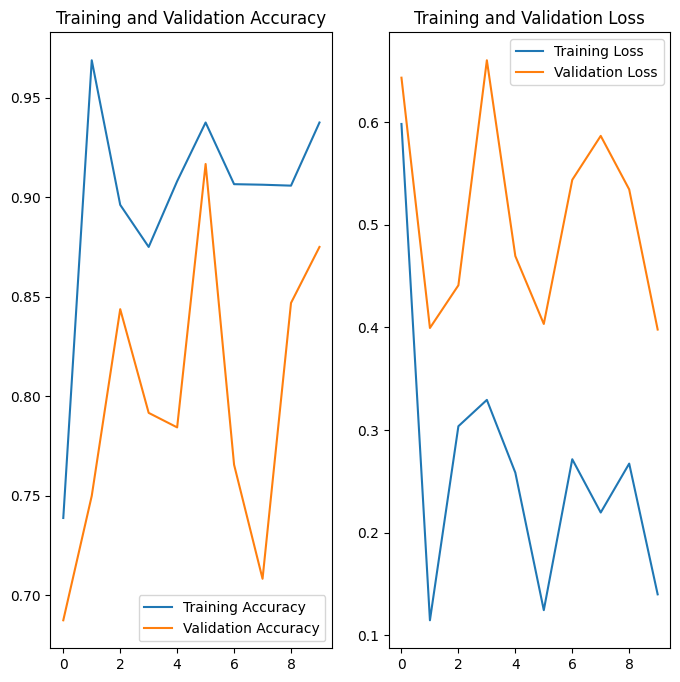

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 10. Predict on test images

In [21]:
test_images = [os.path.join(test_path, img) for img in os.listdir(test_path)]
predictions = []

for img_path in test_images:
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predictions.append('benign' if prediction < 0.5 else 'malignant')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


## 11. Save predictions

In [22]:

with open('predictions.txt', 'w') as f:
    for img_path, pred in zip(test_images, predictions):
        f.write(f"{os.path.basename(img_path)}: {pred}\n")

f = open("predictions.txt", "r")
print(f.read())
f.close()


thirteen.png: malignant
ten.png: malignant
three.png: malignant
fourteen.png: malignant
six.png: benign
two.png: benign
four.png: malignant
twelve.png: benign
eight.png: malignant
five.png: malignant
one.png: benign
seven.png: benign
eleven.png: malignant
nine.png: malignant

